## Statistics: The Science of Decisions Project Instructions

### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <font color="red">RED</font>,  <font color="blue">BLUE</font>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <font color="green">PURPLE</font>, <font color="purple">ORANGE</font>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

### Questions For Investigation

#### 1. What is our independent variable? What is our dependent variable?

The independent variable is the "words condition" (congruent or incongruent) and the dependent variable is the time it takes to name the ink colors.

#### 2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

We want to decide if the mean reading time for the population with a congruent test is significantly different to the mean reading time for the population with a incongruent test. Being $\mu_{C}$ the mean reading time for a population in the congruent condition, $\mu_{I}$ the mean for the incongruent condition, and $\mu_{D}$ its difference, our null hipothesis is both $\mu_{C}$ and $\mu_{I}$ are similar (there is no change given that the list of words is congruent or incongruent), and the alternative hipothesis is that both means are significantly different.

$H_{0}: \mu_{C} = \mu_{I} \Rightarrow \mu_{D} = 0$  

$H_{A}: \mu_{C} \neq \mu_{I} \Rightarrow \mu_{D} \neq 0$  

Given that we only have data for one sample of readers of size 24 in the two conditions (assuming the readers were randomly selected), and we do not know the standard deviation for the reading time of the whole population, we will use a *t-test* in which we will use the sample standard deviation (in our case the sample standard deviation of the difference). The variables we have, reading time values for congruent and incongruent tests, are dependent because the test was taken by the same people reading the two sets of words. Because we want to be cautious and we want to be sure we detect a significative difference between these two sets of values, being the difference positive or negative, we will use a **2 tailed t-test for dependent variables**.

#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [1]:
import pandas as pd

df = pd.read_csv("stroopdata.csv")

In [2]:
print "MEASURES OF CENTRAL TENDENCY"
print "* Mean:"
print df.mean()
print "* Median:"
print df.median()

MEASURES OF CENTRAL TENDENCY
* Mean:
Congruent      14.051125
Incongruent    22.015917
dtype: float64
* Median:
Congruent      14.3565
Incongruent    21.0175
dtype: float64


In [3]:
print "MEASURES OF VARIABILITY"
print "* Sample Standard Deviation:"
print df.std()
print "* Variance:"
print df.var()

MEASURES OF VARIABILITY
* Sample Standard Deviation:
Congruent      3.559358
Incongruent    4.797057
dtype: float64
* Variance:
Congruent      12.669029
Incongruent    23.011757
dtype: float64


In [4]:
import numpy

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print "INTER QUARTILE RANGE:"
print IQR
print "\nRANGE:"
print "Congruent: ",df['Congruent'].max() - df['Congruent'].min()
print "Incongruent: ",df['Incongruent'].max() - df['Incongruent'].min()

print "\nCalculating num of outliers:"
print "WE HAVE TWO OUTLIERS IN THE CONGRUENT CASE:"
out_min_c = Q1['Congruent']-1.5*IQR['Congruent']
out_min_i = Q1['Incongruent']-1.5*IQR['Incongruent']
out_max_c = Q3['Congruent']+1.5*IQR['Congruent']
out_max_i = Q3['Incongruent']+1.5*IQR['Incongruent']

outliers_c = pd.Series(df['Congruent'] < out_min_c) | (df['Congruent'] > out_max_c)
print "outliers Congruent", outliers_c.sum()
outliers_i = pd.Series(df['Incongruent'] < out_min_i) | (df['Incongruent'] > out_max_i)
print "outliers Incongruent", outliers_i.sum()

print "\n***BUT FOR THE SHAKE OF THIS STUDY WE ARE NOT GOING TO REMOVE THEM"
#print "\n***The outliers are discarded from the study"
#df_final = df[df['Incongruent'] < out_max_i].copy()
#print df_final

INTER QUARTILE RANGE:
Congruent      4.30550
Incongruent    5.33475
dtype: float64

RANGE:
Congruent:  13.698
Incongruent:  19.568

Calculating num of outliers:
WE HAVE TWO OUTLIERS IN THE CONGRUENT CASE:
outliers Congruent 0
outliers Incongruent 2

***BUT FOR THE SHAKE OF THIS STUDY WE ARE NOT GOING TO REMOVE THEM


#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11408ac50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x114196dd0>]], dtype=object)

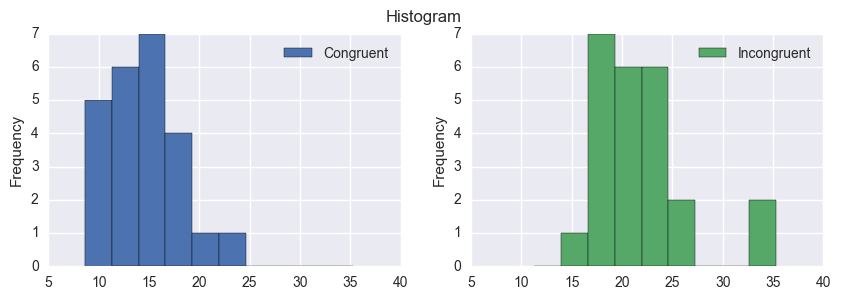

In [5]:
%matplotlib inline
import seaborn as sns
df.plot.hist(bins=10,figsize=(10,3),subplots=True, layout=(1,2), title="Histogram")

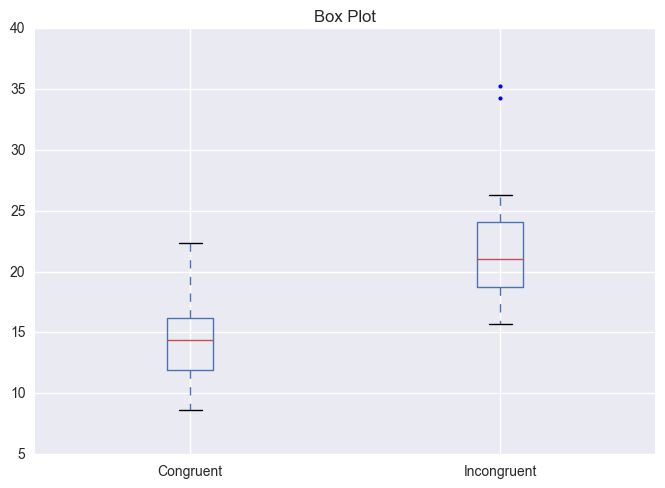

In [6]:
df.plot.box(title="Box Plot", sym=".")

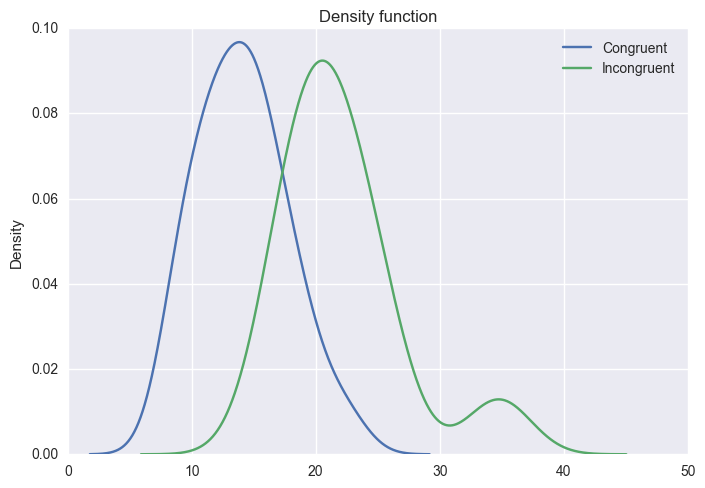

In [7]:
df.plot.density(title="Density function")

The values for the Congruent condition are clearly lower than those from the Incongruent condition. The Congruent values distribution is slightly positively skewed, while in the Incongruent values we can clearly see (in the boxplot and the distribution) the high outliers.

#### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [8]:
import math

# sample size, degreesOfFreedom = 23
n = len(df)
print "sample size:",n
# sample mean of the differences
xD = (df['Congruent']-df['Incongruent']).mean()
print "xD:",xD
# sample standard deviation of the difference
sD = math.sqrt((((df['Congruent']-df['Incongruent'])-xD)**2).sum()/(n-1))
print "sD:",sD
# t-statistic
t_statistic = xD / (sD/math.sqrt(n))
print "t_statistic",t_statistic

sample size: 24
xD: -7.96479166667
sD: 4.86482691036
t_statistic -8.02070694411


In [9]:
# for a probability of 95% we get the t_critical for two tails of 0.025 
t_c = 2.069
interv_1 = xD - t_c * (sD/math.sqrt(n))
print "interv_1:",interv_1
interv_2 = xD + t_c * (sD/math.sqrt(n))
print "interv_2:",interv_2

interv_1: -10.019367912
interv_2: -5.91021542131


In [10]:
# Using scipy library we calculate the precise value for P-value
from scipy import stats as st
st.ttest_rel(df['Congruent'],df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

**RESULTS**

Two-sample t-test, samples are dependent.

Degrees of freedom 24

P-value < 0.00025  => We reject the null

Two tailed test.

Mean of the difference is -7.965 with a **Confidence interval (95%) = (-10.019,-5.91)**

The t statistic value is -8.021, which for a two-tail test means a P value less than 0.00025.
This P value is statistically significant, and therefore, we reject the null $H_{0}$, meaning that  $\mu_{C}$ and $\mu_{I}$ are statistically different, and that the time needed for reading the Incongruent list of words is higher than the time needed to read the Congruent list of words, and this difference is not due to chance. These results were expected, given the difficulty I experienced myself reading the incongruent list.

#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

There are several theories, I think that the idea of the brain reading automatically words faster than recognizing colors is a fair explanation. 

Apparently there is a numerical test for trying to compare two numbers that have different sizes, sizes are recognizable faster by the brain than the value of the number and it is more difficult to recognize a higher number when its size is smaller than the lower number. Probably the results of a test where first the lower number is smaller, and then the lower number is bigger in size than the higher, would have similar results.  

## References
* http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html#pandas.DataFrame
* https://docs.python.org/2/library/math.html
* https://docs.python.org/2/library/functions.html
* https://en.wikipedia.org/wiki/Stroop_effect